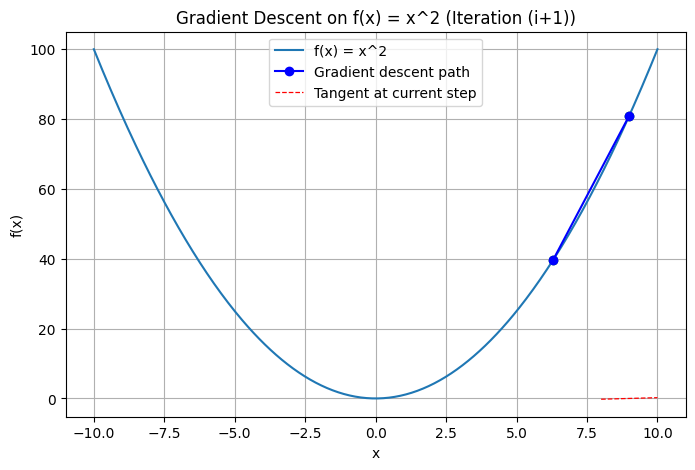

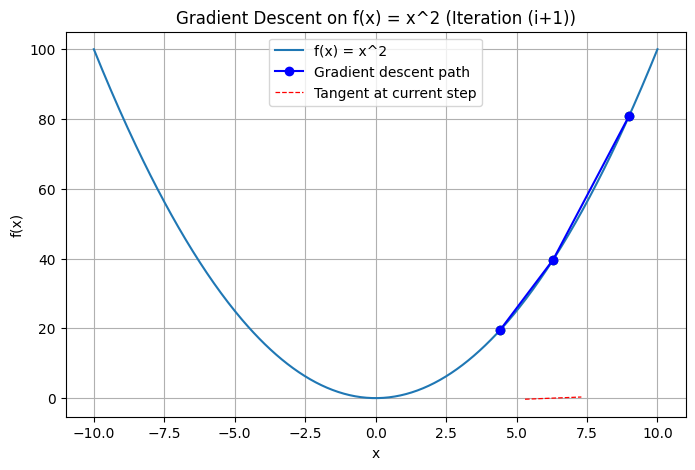

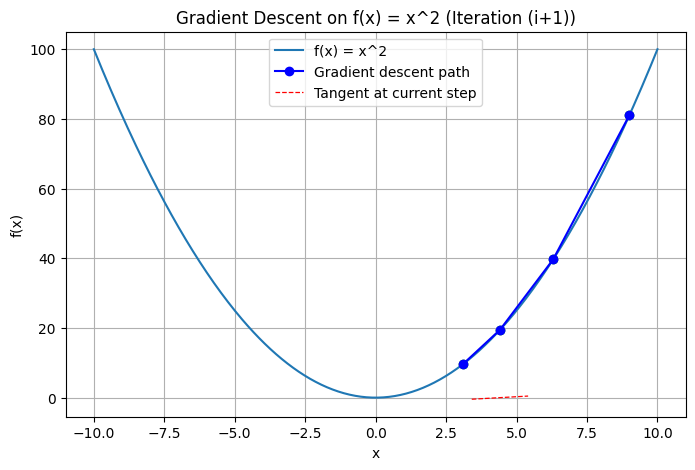

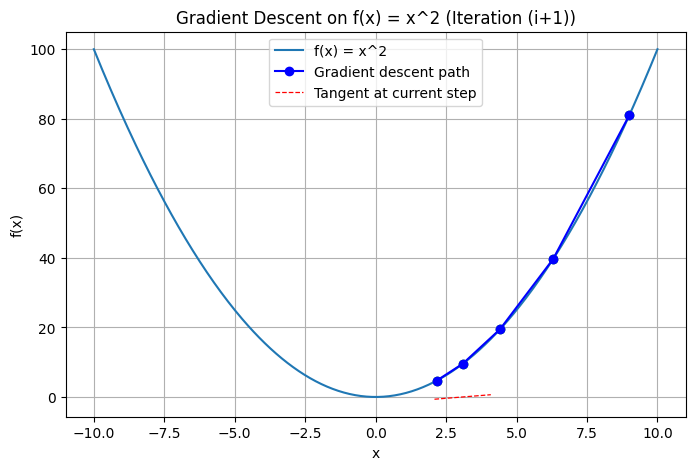

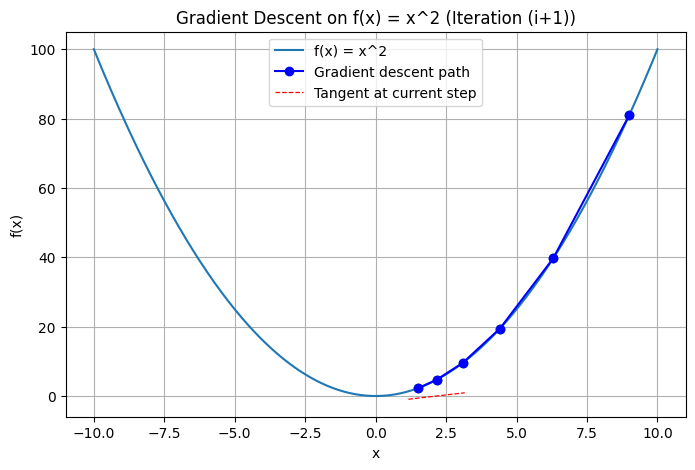

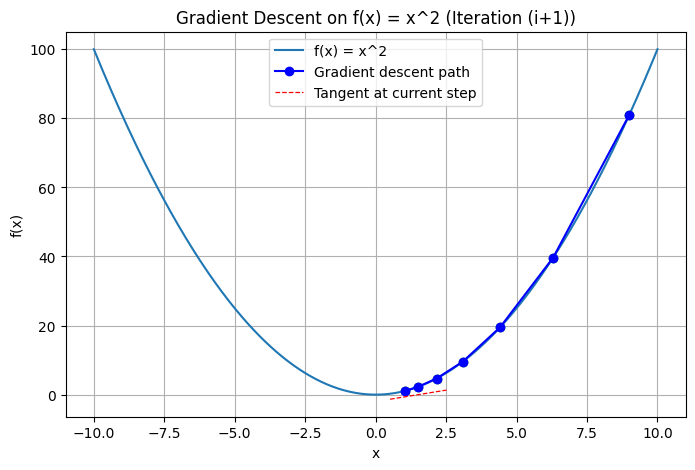

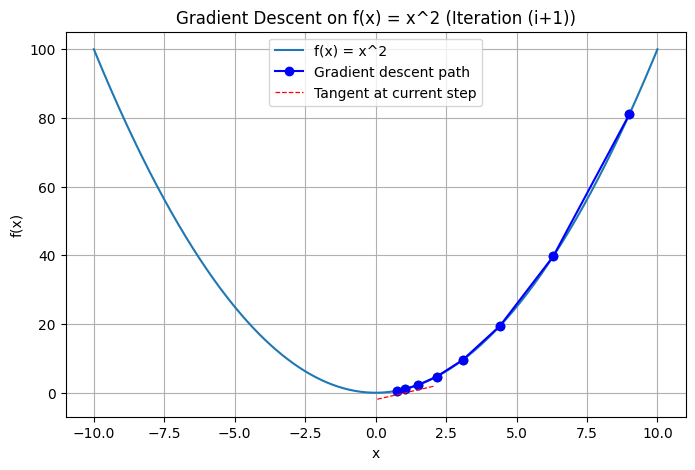

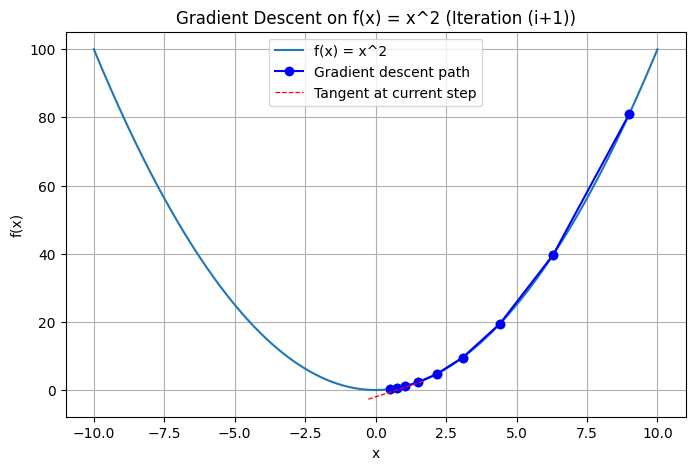

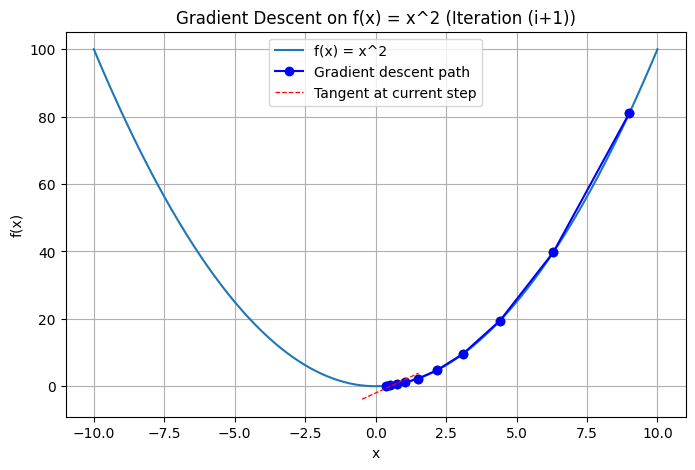

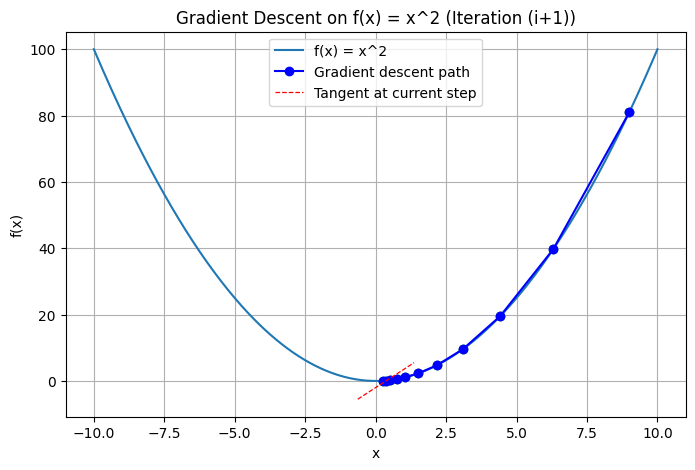

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function
def f(x):
    return x**2

# Derivative of the loss function
def df(x):
    return 2*x

# Gradient descent parameters
x_start = 9 # Initial guess
learning_rate = 0.15
n_iterations = 10

# For storing the iteration steps for visualization
x_steps = [x_start]
y_steps = [f(x_start)]

# Values for plotting the parabola
x = np.linspace(-10, 10, 400)
y = f(x)


for i in range(n_iterations):
    plt.figure(figsize=(8, 5))

    # Plot the parabola
    plt.plot(x, y, label='f(x) = x^2')

    # Current position on the parabola
    current_x = x_steps[-1]
    current_y = y_steps[-1]

    # Calculate the gradient
    gradient = df(current_x)

    # Update the position (gradient descent step)
    next_x = current_x - learning_rate * gradient
    next_y = f(next_x)

    # Save the new position
    x_steps.append(next_x)
    y_steps.append(next_y)

    # Plot the current step path
    plt.scatter(x_steps, y_steps, color='green')
    plt.plot(x_steps, y_steps, linestyle='-', marker='o', color='blue', label='Gradient descent path')

    # Plot the tangent line (derivative at current point)
    tangent_x = np.linspace(current_x - 1, current_x + 1, 10)
    tangent_y = gradient * (tangent_x - current_x) / current_y
    plt.plot(tangent_x, tangent_y, '--', color='red', linewidth=0.9, label='Tangent at current step')

    plt.title('Gradient Descent on f(x) = x^2 (Iteration (i+1))')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

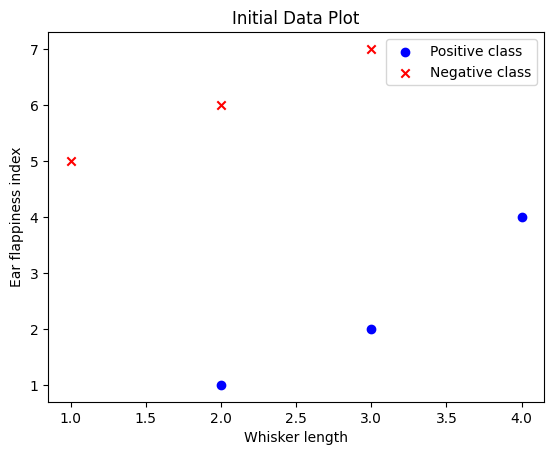

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([
    [2, 1],
    [3, 2],
    [4, 4], # Positive examples
    [1, 5],
    [2, 6],
    [3, 7] # Negative examples
])
y = np.array([1, 1, 1, 0, 0, 0]) # Labels

# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Initial Data Plot')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function: Log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

# Gradient of the loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

In [16]:
# Logistic regression model
def logistic_regression(X, y, learning_rate=0.1, num_iterations=10):
    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient

        # if i%10 == 0:
        plot_decision_boundary(X, y, weights, loss, i)
        print(f"Iteration {i}: Theta={weights}, Loss={loss}")

    return weights

In [17]:
# Plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o', label='Positive class' if iteration == 0 else "")
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x', label='Negative class' if iteration == 0 else "")

    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f"Decision boundary at iteration {iteration}\nloss: {loss}")
    if iteration == 0:
        plt.legend()
    plt.show()

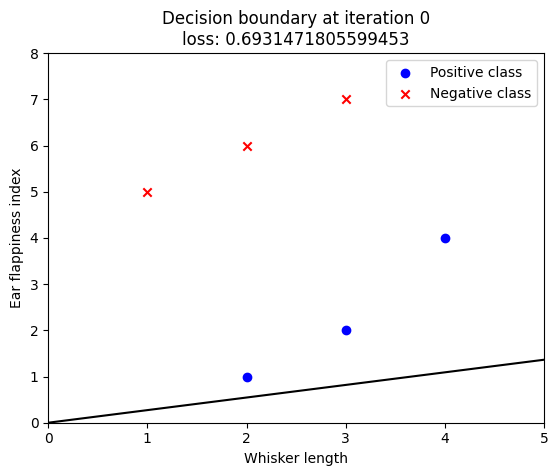

Iteration 0: Theta=[ 0.          0.025      -0.09166667], Loss=0.6931471805599453


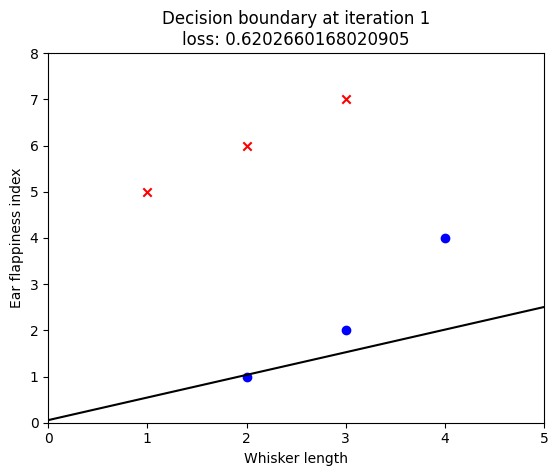

Iteration 1: Theta=[ 0.00784781  0.06887779 -0.14060525], Loss=0.6202660168020905


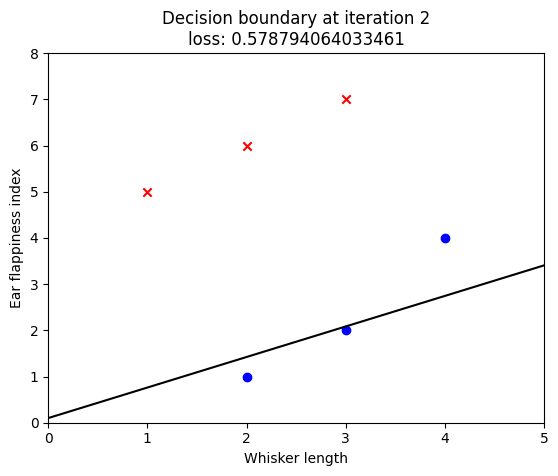

Iteration 2: Theta=[ 0.01764134  0.11658362 -0.17629863], Loss=0.578794064033461


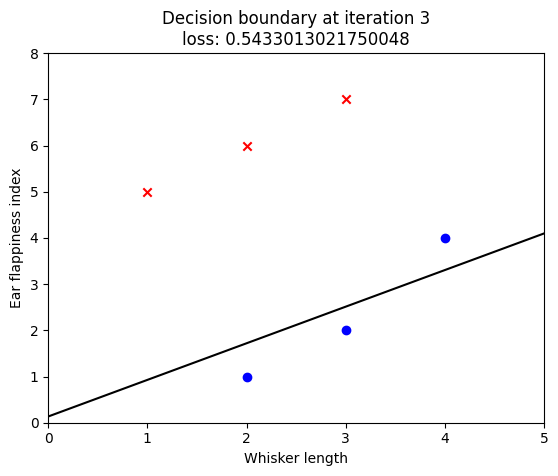

Iteration 3: Theta=[ 0.02775584  0.16401158 -0.20689154], Loss=0.5433013021750048


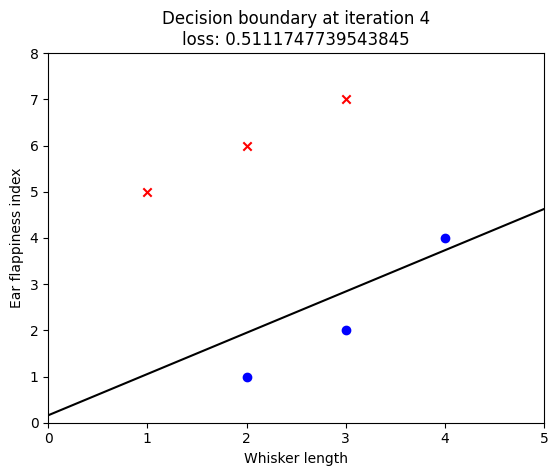

Iteration 4: Theta=[ 0.03768945  0.20992896 -0.23499581], Loss=0.5111747739543845


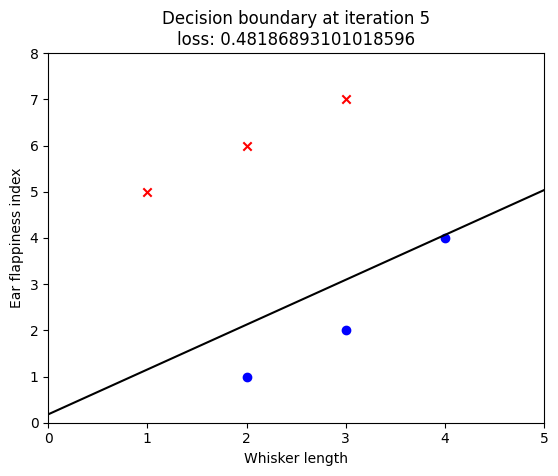

Iteration 5: Theta=[ 0.04728565  0.25399034 -0.26154053], Loss=0.48186893101018596


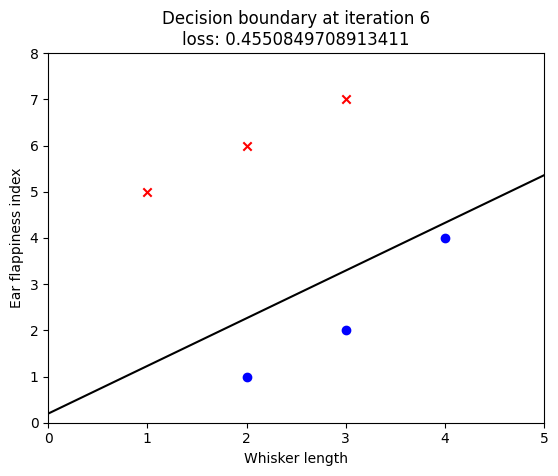

Iteration 6: Theta=[ 0.0565048   0.29615111 -0.28688777], Loss=0.4550849708913411


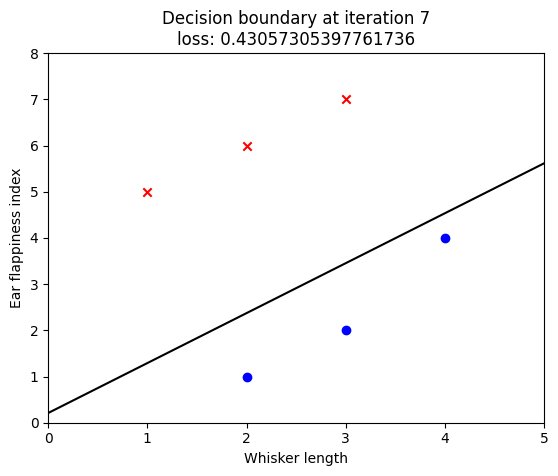

Iteration 7: Theta=[ 0.06534809  0.33647087 -0.31119923], Loss=0.43057305397761736


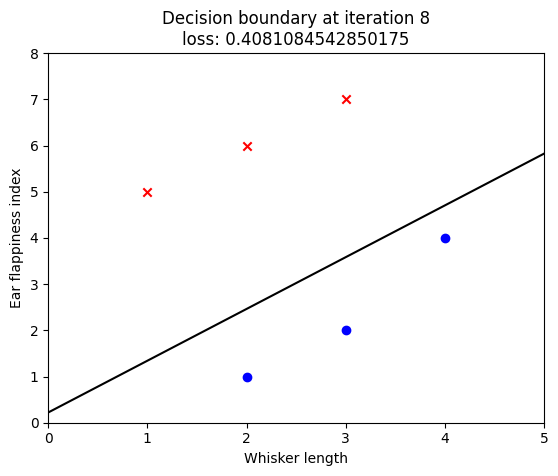

Iteration 8: Theta=[ 0.07383072  0.37504349 -0.3345636 ], Loss=0.4081084542850175


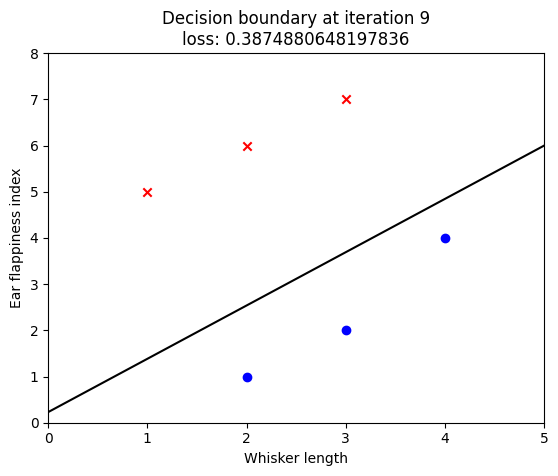

Iteration 9: Theta=[ 0.08197221  0.41197135 -0.35704216], Loss=0.3874880648197836


In [18]:
whights = logistic_regression(X, y)